In [1]:
%pylab inline
import scipy

from pyiga import bspline, assemble, geometry, solvers, vis, topology

from scipy.io import mmwrite

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
numpy.set_printoptions(linewidth=100000)

setting up constraints took 0.0035665035247802734 seconds.
Basis setup took 0.004039764404296875 seconds


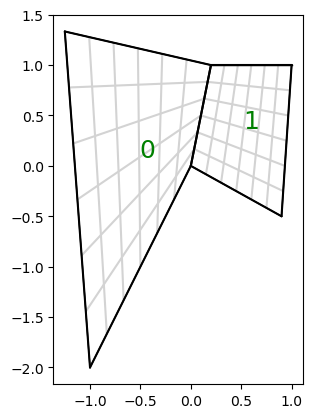

In [104]:
deg, N = 2,6

geo1 = geometry.Quad(np.array([[0,0],[-1,-2],[1/5,1],[-5/4,4/3]]).T)
geo2 = geometry.Quad(np.array([[0,0],[9/10,-1/2],[1/5,1],[1,1]]).T)

#geo1=geometry.unit_square()
#geo2=geometry.unit_square().translate((1,0))
kvs = 2 * (bspline.make_knots(deg, 0.0, 1.0, N),)

M = topology.PatchMesh([(kvs,geo1),(kvs,geo2)])
MP = assemble.Multipatch(M, automatch=1)
M.draw(knots=1,patch_idx=1)

In [105]:
u = lambda x,y: x+y
Ah = MP.assemble_volume('(tr(hess(u)) * tr(hess(v))) * dx', arity=2, decoupled=0)
Mh = MP.assemble_volume('(u * v) * dx', arity=2, decoupled=0)
Uh = MP.assemble_volume('f * v * dx', f=u ,arity=1, decoupled=0)
u_ = solvers.make_solver(Mh)@Uh

In [106]:
mmwrite("biharmonic_stiffness_p"+str(deg)+"_n"+str(N)+"_r"++".mtx", A)

TypeError: bad operand type for unary +: 'str'

In [103]:
Ah@u_

array([-9.86468400e-08,  8.00889666e-09,  6.44718057e-10,  3.92219590e-12, -5.11590770e-13,  6.53699317e-12, -1.51203494e-11,  6.93489710e-12,  8.83917650e-08,  8.55767723e-09, -3.13150395e-10, -2.82796009e-12,  9.62785407e-12, -2.66453526e-11,  3.33528760e-11, -1.32160949e-11, -4.67104666e-09, -2.40227749e-09, -6.35438369e-11, -7.86215537e-12, -7.87636623e-12,  1.59730007e-11, -1.23989707e-11,  8.27782287e-13,  1.10970788e-10,  2.60711452e-11, -1.60582658e-12, -1.16440191e-12,  5.71809267e-12, -7.97406585e-12,  5.53307400e-12, -4.51638726e-13, -9.93605198e-12,  2.08277839e-12,  3.94351218e-13,  2.29885555e-13, -1.82054372e-12,  2.92477154e-12, -2.24709140e-12, -4.16777723e-13,  4.52970994e-13, -4.07229805e-13, -5.72875081e-14, -2.48467913e-13,  8.08075828e-13, -1.06098463e-12,  3.95350419e-13,  1.33448808e-13,  5.86197757e-13,  1.07691633e-13,  2.30926389e-14,  3.21964677e-14, -1.47881707e-13,  3.08197912e-13, -3.09086090e-13,  6.83897383e-14, -6.53699317e-13,  1.33226763e-14, -1.3322